In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('3_class_bace.csv', sep=';')
# Display top of dataframe
data.head()

,SMILES,bace_class
0,C[C@H](CC1=C(N)N=C2C=CC(=CC2=C1)C1=CC=CC=C1C)C...,yes
1,CCCO[C@H]1C[NH2+][C@H](C1)[C@@H](O)[C@H](CC1=C...,yes
2,CCC1=CN2CCS(=O)(=O)N(C)C3=C2C1=CC(=C3)C(=O)N[C...,yes
3,CCOC[C@@H](OC1=C(N)C(F)=CC(C[C@@H]2CS(=O)(=O)C...,yes
4,CCC1=CN2CCS(=O)(=O)N(C)C3=C2C1=CC(=C3)C(=O)N[C...,yes


In [3]:
data1 = pd.read_csv('data3_col.csv')
# Display top of dataframe
data1.head()

,MW,AMW,nP,nI,nB,nStructures,totalcharge,Psi_e_t,Psi_e_1s,SpMax_X,...,F10[I-I],F10[I-B],F10[I-Si],F10[I-X],F10[B-B],F10[B-Si],F10[B-X],F10[Si-Si],F10[Si-X],F10[X-X]
0,431.6,6.640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,656.9,6.772,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,590.8,7.385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590.8,7.574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,628.8,7.959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# X=data1.drop(columns =['SMILES','CASRN','EXTERNALID','N','NAME.1','ARTICLEID','PUBMEDID','PAGE','NAME','TABLE','ERROR'])
# X

In [10]:
X=data1
X

,MW,AMW,nP,nI,nB,nStructures,totalcharge,Psi_e_t,Psi_e_1s,SpMax_X,...,F10[I-I],F10[I-B],F10[I-Si],F10[I-X],F10[B-B],F10[B-Si],F10[B-X],F10[Si-Si],F10[Si-X],F10[X-X]
0,431.6,6.640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,656.9,6.772,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,590.8,7.385,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,590.8,7.574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,628.8,7.959,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,364.9,7.298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1507,357.9,7.953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1508,320.2,9.703,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1509,317.4,7.382,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = data['bace_class'].astype('category').cat.codes
y

0       1
1       1
2       1
3       1
4       1
       ..
1506    0
1507    0
1508    0
1509    0
1510    0
Length: 1511, dtype: int8

In [6]:
def getFeature(mask):
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)
            
    return new_features

In [7]:
def myModel(myX,myY,X_test,y_test):
    # instantiate the model (using the default parameters)
    reg = LinearRegression().fit(myX, myY)
    y_pred = reg.predict(X_test)
   
    return reg.score(X_test,y_test)

### 1. Chi-square

In [11]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X_norm, y)
chi_features = getFeature(chi_selector.get_support())
chi_features

['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']

In [12]:
X_chi = X[chi_features]
X_chi

,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
0,431.6,6.640,0.0,0.0,0.0,0.0
1,656.9,6.772,0.0,0.0,0.0,0.0
2,590.8,7.385,0.0,0.0,0.0,0.0
3,590.8,7.574,0.0,0.0,0.0,0.0
4,628.8,7.959,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1506,364.9,7.298,0.0,0.0,0.0,0.0
1507,357.9,7.953,0.0,0.0,0.0,0.0
1508,320.2,9.703,0.0,0.0,0.0,0.0
1509,317.4,7.382,0.0,0.0,0.0,0.0


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X_chi,y,test_size=0.25,random_state=0)
xi_score = myModel(X_train,y_train,X_test,y_test)
xi_score 


0.11639753404266195

### 2. Mutual Information

In [14]:
from sklearn.feature_selection import mutual_info_classif
mi_selector = SelectKBest(mutual_info_classif, k=6)
mi_selector.fit(X, y)
mi_feature = getFeature(mi_selector.get_support())
mi_feature

['MW', 'AMW', 'B05[I-Si]', 'B08[N-X]', 'B09[Cl-I]', 'F02[Si-X]']

In [15]:
X_mi = X[mi_feature]
X_train,X_test,y_train,y_test=train_test_split(X_mi,y,test_size=0.25,random_state=0)
mi_score = myModel(X_train,y_train,X_test,y_test)
mi_score

0.11357079273564707

### 3. Anova F-value

In [16]:
#3 Anova F-value
from sklearn.feature_selection import f_classif
anov_selector = SelectKBest(f_classif, k=6)
anov_selector.fit(X, y)
anova_feature = getFeature(anov_selector.get_support())
anova_feature

/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   2    4    5 ... 1309 1310 1311] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']

In [17]:
X_anova = X[anova_feature]
X_train,X_test,y_train,y_test=train_test_split(X_anova,y,test_size=0.25,random_state=0)
anova_score = myModel(X_train,y_train,X_test,y_test)
anova_score

0.11639753404266195

### 4. Variance Threshold

In [18]:
#4 Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=1)
var_selector.fit_transform(X)
var_feature = getFeature(var_selector.get_support())
len(var_feature)

1

In [19]:
X_thresh = X[var_feature]
X_train,X_test,y_train,y_test=train_test_split(X_thresh,y,test_size=0.25,random_state=0)
vt_score = myModel(X_train,y_train,X_test,y_test)
vt_score

0.10319146970754978

### 5. Fisher Score

In [20]:
#5. Fisher Score
from skfeature.function.similarity_based import fisher_score
score = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
X.columns[score[:6]]

Index(['F03[C-P]', 'F10[I-I]', 'F07[P-Br]', 'F07[P-I]', 'F06[O-Si]',
       'F05[C-X]'],
      dtype='object')

In [21]:
X_fisher = X[X.columns[score[:6]]]
X_train,X_test,y_train,y_test=train_test_split(X_fisher,y,test_size=0.25,random_state=0)
fsh_score = myModel(X_train,y_train,X_test,y_test)
fsh_score

-0.004392256386703819

### 6. MultiSURF

In [22]:
#6. MultiSURF
from skrebate import MultiSURF
fs = MultiSURF(n_jobs=-1, n_features_to_select=X.columns)
fs.fit(X.values, y.values)
fs

MultiSURF(n_features_to_select=Index(['MW', 'AMW', 'nP', 'nI', 'nB', 'nStructures', 'totalcharge', 'Psi_e_t',
       'Psi_e_1s', 'SpMax_X',
       ...
       'F10[I-I]', 'F10[I-B]', 'F10[I-Si]', 'F10[I-X]', 'F10[B-B]',
       'F10[B-Si]', 'F10[B-X]', 'F10[Si-Si]', 'F10[Si-X]', 'F10[X-X]'],
      dtype='object', length=1312),
          n_jobs=-1)

In [23]:
X_multi = X[X.columns]
X_train,X_test,y_train,y_test=train_test_split(X_multi,y,test_size=0.25,random_state=0)
ms_score = myModel(X_train,y_train,X_test,y_test)
ms_score

0.11639753404266118

### 7. Recursive Feature Elimination

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LinearRegression(), 
                   n_features_to_select=6, step=1, verbose=-1)
rfe_selector.fit(X_norm, y)
rfe_feature = getFeature(rfe_selector.get_support())
rfe_feature

['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']

In [41]:
X_rec = X[rfe_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rec,y,test_size=0.25,random_state=0)
rfe_score = myModel(X_train,y_train,X_test,y_test)
rfe_score

0.11639753404266195

### 8. Permutation Importance

In [ ]:
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
perm = PermutationImportance(LinearRegression(), random_state=42, cv=10)
perm.fit(X, y)
perm_selector = SelectFromModel(perm,max_features=6).fit(X, y)
perm_feature = getFeature(perm_selector.get_support())
perm_feature

In [26]:
perm_feature = ['MW', 'nTB', 'nR03', 'O-061', 'F-081', 'B05[O-F]']

In [28]:
# X_perm = X[perm_feature]
# X_train,X_test,y_train,y_test=train_test_split(X_perm,y,test_size=0.25,random_state=0)
# y_pred = myModel(X_train,y_train,X_test,y_test)
# y_pred

In [29]:
pi_score = 0.159567722559

### 9. SHAP

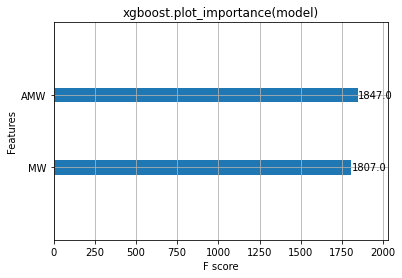

In [30]:
import shap
import xgboost
import matplotlib.pylab as pl
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [31]:
X_shap = X[['AMW', 'MW']]
X_train,X_test,y_train,y_test=train_test_split(X_shap,y,test_size=0.25,random_state=0)
shap_score = myModel(X_train,y_train,X_test,y_test)
shap_score

0.11357079273564696

### 10. Boruta

In [32]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=6)
boru_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
boru_selector.fit(X.values, y.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=33, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FF3D8986740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FF3D8986740)

In [33]:
accept = X.columns[boru_selector.support_].to_list()
#accept

In [34]:
X_boruta = X[accept]
X_train,X_test,y_train,y_test=train_test_split(X_boruta,y,test_size=0.25,random_state=0)
boruta_score = myModel(X_train,y_train,X_test,y_test)
boruta_score

0.11357079273564707

### 11. Embedded Random Forest

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=6)
embeded_rf_selector.fit(X, y)
embeded_rf_feature = getFeature(embeded_rf_selector.get_support())
embeded_rf_feature

['MW', 'AMW', 'nI', 'C-042', 'CATS2D_01_DD']

In [36]:
X_rf = X[embeded_rf_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rf,y,test_size=0.25,random_state=0)
erf_score = myModel(X_train,y_train,X_test,y_test)
erf_score

0.11640086089589619

### 12. Embedded LightGBM

In [37]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=6)
embeded_lgb_selector.fit(X, y)
embeded_lgb_feature = getFeature(embeded_lgb_selector.get_support())
embeded_lgb_feature

['MW', 'AMW']

In [38]:
X_lgbm = X[embeded_lgb_feature]
X_train,X_test,y_train,y_test=train_test_split(X_lgbm,y,test_size=0.25,random_state=0)
elg_score = myModel(X_train,y_train,X_test,y_test)
elg_score

0.11357079273564707

In [43]:
chi_table = ['Chi-square', float("{:.4f}".format(xi_score)), 'MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']
mi_table = ['Mutual Information',float("{:.4f}".format(mi_score)) , 'MW', 'AMW', 'B04[F-I]', 'B06[C-Si]', 'B10[P-Br]', 'F08[P-X]']
anova_table = ['Anova F-value', float("{:.4f}".format(anova_score)), 'MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']
var_table = ['Variance Threshold',float("{:.4f}".format(vt_score)),'MW', 'AMW','-','-','-','-']
fisher_table = ['Fisher Score', float("{:.4f}".format(fsh_score)), 'F03[C-P]', 'F10[I-I]', 'F07[P-Br]', 'F07[P-I]', 'F06[O-Si]','F05[C-X]']
multi_table = ['MultiSURF',float("{:.4f}".format(ms_score)),'-','-','-','-','-','-']
rec_table = ['Recursive Feature Elimination',float("{:.4f}".format(rfe_score)), 'MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD']
perm_table = ['Permutation Importance',float("{:.4f}".format(pi_score)),'MW', 'nTB', 'nR03', 'O-061', 'F-081', 'B05[O-F]']
shap_table = ['SHAP', float("{:.4f}".format(shap_score)), 'AMW', 'MW', '-','-','-','-']
boruta_table = ['Boruta',float("{:.4f}".format(boruta_score)),'MW', 'AMW','-','-','-','-']
rf_table = ['Embedded Random Forest',float("{:.4f}".format(erf_score)) ,'MW', 'AMW', 'nI', 'C-042', 'CATS2D_01_DD','-']
lgbm_table =['Embedded LightGBM', float("{:.4f}".format(elg_score)), 'MW', 'AMW', '-','-','-','-']

In [44]:
myTable = [chi_table, mi_table, anova_table,var_table, fisher_table, multi_table, rec_table, perm_table, shap_table,
          boruta_table, rf_table, lgbm_table]




In [53]:
results = pd.DataFrame(myTable,columns=['Method', 'R^2 score','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'])

results                    

,Method,R^2 score,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.1136,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.1032,MW,AMW,-,-,-,-
4,Fisher Score,-0.0044,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.1164,-,-,-,-,-,-
6,Recursive Feature Elimination,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.1596,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.1136,AMW,MW,-,-,-,-
9,Boruta,0.1136,MW,AMW,-,-,-,-


In [94]:
results.to_csv('read_csv.csv', index=False)
results

,Method,R^2 score,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.1136,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.1032,MW,AMW,-,-,-,-
4,Fisher Score,-0.0044,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.1164,-,-,-,-,-,-
6,Recursive Feature Elimination,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.1596,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.1136,AMW,MW,-,-,-,-
9,Boruta,0.1136,MW,AMW,-,-,-,-


In [93]:
results = ('result3_linear.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-93-f4274fb0005a>, line 1)

In [92]:
results

,Method,R^2 score,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.1136,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.1032,MW,AMW,-,-,-,-
4,Fisher Score,-0.0044,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.1164,-,-,-,-,-,-
6,Recursive Feature Elimination,0.1164,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.1596,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.1136,AMW,MW,-,-,-,-
9,Boruta,0.1136,MW,AMW,-,-,-,-


In [47]:
import seaborn as sns

In [142]:
cmr = sns.light_palette("red", as_cmap=True)
cmy = sns.light_palette("yellow", as_cmap=True)

 
# Visualizing the DataFrame with set precision
print("\nModified Stlying DataFrame:")
results.style.background_gradient(cmap=cm)
  


Modified Stlying DataFrame:


,Method,R^2 score,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.113600,0.642857,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.103200,0.642857,MW,AMW,-,-,-,-
4,Fisher Score,-0.004400,0.518519,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.116400,0.642857,-,-,-,-,-,-
6,Recursive Feature Elimination,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.159600,0.671958,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.113600,0.642857,AMW,MW,-,-,-,-
9,Boruta,0.113600,0.642857,MW,AMW,-,-,-,-


In [97]:
fd = results[['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6']]
fd

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,MW,AMW,-,-,-,-
4,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,-,-,-,-,-,-
6,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,AMW,MW,-,-,-,-
9,MW,AMW,-,-,-,-


In [161]:
def getArray(df):
    import numpy as np

    aa = np.array(df[['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6']])
    
    arr=[]
    for val in aa:
        vek=[]
        for col in val:
            s = 0
            for i in aa:
                for j in i:
                    if(j== col and j!='-'):
                        s=s+1
            vek.append(s)
        arr.append(vek)

    return arr  

In [98]:
import numpy as np

aa = np.array(fd)
aa

array([['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD'],
       ['MW', 'AMW', 'B04[F-I]', 'B06[C-Si]', 'B10[P-Br]', 'F08[P-X]'],
       ['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD'],
       ['MW', 'AMW', '-', '-', '-', '-'],
       ['F03[C-P]', 'F10[I-I]', 'F07[P-Br]', 'F07[P-I]', 'F06[O-Si]',
        'F05[C-X]'],
       ['-', '-', '-', '-', '-', '-'],
       ['MW', 'AMW', 'nI', 'C-032', 'C-042', 'CATS2D_01_DD'],
       ['MW', 'nTB', 'nR03', 'O-061', 'F-081', 'B05[O-F]'],
       ['AMW', 'MW', '-', '-', '-', '-'],
       ['MW', 'AMW', '-', '-', '-', '-'],
       ['MW', 'AMW', 'nI', 'C-042', 'CATS2D_01_DD', '-'],
       ['MW', 'AMW', '-', '-', '-', '-']], dtype=object)

In [99]:
aa.shape

(12, 6)

In [100]:
boyash = np.zeros((12,6))
boyash

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [101]:
arr=[]
for val in aa:
    vek=[]
    for col in val:
        s = 0
        for i in aa:
            for j in i:
                if(j== col and j!='-'):
                    s=s+1
        vek.append(s)
    arr.append(vek)
    
arr
        

[[10, 9, 4, 3, 4, 4],
 [10, 9, 1, 1, 1, 1],
 [10, 9, 4, 3, 4, 4],
 [10, 9, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0],
 [10, 9, 4, 3, 4, 4],
 [10, 1, 1, 1, 1, 1],
 [9, 10, 0, 0, 0, 0],
 [10, 9, 0, 0, 0, 0],
 [10, 9, 4, 4, 4, 0],
 [10, 9, 0, 0, 0, 0]]

In [102]:
StartingDataFrame = pd.DataFrame({'HRC':['aaa','HRD ','HRC oo'],
                                  'A':[1,2,3]})


def highlight_cells(x):
    c1 = 'background-color: red'
    c = 'background-color: white'

   #if True are strings
    m1 = StartingDataFrame['HRC'].str.contains("HRC", na=False)

    df1 = pd.DataFrame(c, index=x.index, columns=x.columns)
    df1.loc[m1, 'HRC'] = c1
    return df1

(StartingDataFrame.style.apply(highlight_cells,axis=None))
StartingDataFrame

,HRC,A
0,aaa,1
1,HRD,2
2,HRC oo,3


In [70]:
KNOWN_COLORS = {"Red": (255, 0, 0), "Yellow": (255, 255, 0), "Green": (0, 255, 0)}

def color_difference (color1, color2) -> int:
    """ calculate the difference between two colors as sum of per-channel differences """
    return sum([abs(component1-component2) for component1, component2 in zip(color1, color2)])


def get_color_name(color) -> str:
    """ guess color name using the closest match from KNOWN_COLORS """
    differences =[
        [color_difference(color, known_color), known_name]
        for known_name, known_color in KNOWN_COLORS.items()
    ]
    differences.sort()  # sorted by the first element of inner lists
    return differences[0][1]  # the second element is the name


my_color = (123, 234, 100)

print(get_color_name(my_color))

# zero copyrights / public domain

Green


In [73]:
x = results.copy()
factors = list(x['Feature 1'].unique())
i = 0
for factor in factors:
    print(factor)

MW
F03[C-P]
-
AMW


In [105]:
results.iloc[0,0]

'Chi-square'

In [134]:
# df.style.set_table_styles(
#     [{'selector': 'tr:hover',
#       'props': 'background-color: yellow; font-size: 1em;'}]

In [133]:
# def format_color_groups(df):
#     colors = ['#AED581', 'lightblue','red','yellow']
#     x = df.copy()
#     factors = list(x['Feature 1'].unique())
#     i = 0
#     for factor in factors:
#         style = f'background-color:red;'
#         print(style)
#         # x['Feature 1'][0] = style
#         x.iloc[0,0]= style
#         i=i+1
#     return x

# results.style.apply(format_color_groups, axis=None)

In [164]:
def style_specific_cell(x):
    arr = getArray(df)
    print(arr)
    color = ['background-color: white','background-color: #F1F8E9','background-color: #DCEDC8','background-color: #C5E1A5','background-color: #AED581','background-color: #9CCC65', 'background-color: #8BC34A','background-color: #7CB342','background-color: #689F38','background-color: #558B2F','background-color: #33691E']
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    for i in range(df.shape[0]):
        for j in range(3,df.shape[1]):
            df1.iloc[i, j] = color[arr[i][j-3]]
    return df1

In [165]:
def boyash(df):
    print("boyash")
    df.style.apply(style_specific_cell, axis=None).highlight_max(axis=0, props='background-color:#FF0000;', subset=['R^2 score','Accuracy']).highlight_min(axis=0, props='background-color:#FF7700;', subset=['R^2 score','Accuracy'])
    

In [149]:
def style_specific_cell(x):

    color = ['background-color: white','background-color: #F1F8E9','background-color: #DCEDC8','background-color: #C5E1A5','background-color: #AED581','background-color: #9CCC65', 'background-color: #8BC34A','background-color: #7CB342','background-color: #689F38','background-color: #558B2F','background-color: #33691E']
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    for i in range(results.shape[0]):
        for j in range(3,results.shape[1]):
            df1.iloc[i, j] = color[arr[i][j-3]]
    return df1

results.style.apply(style_specific_cell, axis=None).highlight_max(axis=0, props='background-color:#FF0000;', subset=['R^2 score','Accuracy']).highlight_min(axis=0, props='background-color:#FF7700;', subset=['R^2 score','Accuracy'])

,Method,R^2 score,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.113600,0.642857,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.103200,0.642857,MW,AMW,-,-,-,-
4,Fisher Score,-0.004400,0.518519,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.116400,0.642857,-,-,-,-,-,-
6,Recursive Feature Elimination,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.159600,0.671958,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.113600,0.642857,AMW,MW,-,-,-,-
9,Boruta,0.113600,0.642857,MW,AMW,-,-,-,-


In [148]:
results.style.highlight_max(axis=0, props='background-color:#FF0000;', subset=['R^2 score','Accuracy']).highlight_min(axis=0, props='background-color:#FF7700;', subset=['R^2 score','Accuracy'])

,Method,R^2 score,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.113600,0.642857,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.103200,0.642857,MW,AMW,-,-,-,-
4,Fisher Score,-0.004400,0.518519,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.116400,0.642857,-,-,-,-,-,-
6,Recursive Feature Elimination,0.116400,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.159600,0.671958,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.113600,0.642857,AMW,MW,-,-,-,-
9,Boruta,0.113600,0.642857,MW,AMW,-,-,-,-


In [117]:
results.shape

(12, 8)

In [119]:
results.shape[1]

8

In [123]:
dd = ['background-color: #F1F8E9','background-color: #DCEDC8','background-color: #C5E1A5','background-color: #AED581','background-color: #9CCC65', 'background-color: #8BC34A','background-color: #7CB342','background-color: #689F38','background-color: #558B2F','background-color: #33691E']

In [150]:
pd.__version__

'1.4.2'

In [127]:
len(arr[0])

6

In [130]:
type(arr[0][0])

int

In [135]:
r2 = pd.read_csv('result3_log.csv')
r2

,Unnamed: 0,Method,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,0,Chi-square,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,1,Mutual Information,0.642857,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,2,Anova F-value,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,3,Variance Threshold,0.642857,MW,AMW,-,-,-,-
4,4,Fisher Score,0.518519,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,5,MultiSURF,0.642857,-,-,-,-,-,-
6,6,Recursive Feature Elimination,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,7,Permutation Importance,0.671958,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,8,SHAP,0.642857,AMW,MW,-,-,-,-
9,9,Boruta,0.642857,MW,AMW,-,-,-,-


In [136]:
getCol = r2['Accuracy']
getCol

0     0.642857
1     0.642857
2     0.642857
3     0.642857
4     0.518519
5     0.642857
6     0.642857
7     0.671958
8     0.642857
9     0.642857
10    0.642857
11    0.642857
Name: Accuracy, dtype: float64

In [137]:
results.insert(loc=2, column='Accuracy', value=getCol)
results

,Method,R^2 score,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.1164,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
1,Mutual Information,0.1136,0.642857,MW,AMW,B04[F-I],B06[C-Si],B10[P-Br],F08[P-X]
2,Anova F-value,0.1164,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
3,Variance Threshold,0.1032,0.642857,MW,AMW,-,-,-,-
4,Fisher Score,-0.0044,0.518519,F03[C-P],F10[I-I],F07[P-Br],F07[P-I],F06[O-Si],F05[C-X]
5,MultiSURF,0.1164,0.642857,-,-,-,-,-,-
6,Recursive Feature Elimination,0.1164,0.642857,MW,AMW,nI,C-032,C-042,CATS2D_01_DD
7,Permutation Importance,0.1596,0.671958,MW,nTB,nR03,O-061,F-081,B05[O-F]
8,SHAP,0.1136,0.642857,AMW,MW,-,-,-,-
9,Boruta,0.1136,0.642857,MW,AMW,-,-,-,-


In [156]:
data2=pd.read_csv('result2_both.csv')
data2

,Method,R^2 score,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.1120,0.789157,MW,AMW,nTB,nP,totalcharge,F10[X-X]
1,Mutual Information,0.1026,0.789157,MW,AMW,P-119,B01[Br-I],B08[O-I],F04[Br-B]
2,Anova F-value,0.1120,0.789157,MW,AMW,nTB,nP,totalcharge,F10[X-X]
3,Variance Threshold,0.1120,0.789157,MW,AMW,nTB,nP,totalcharge,-
4,Fisher Score,-0.0002,0.765060,F10[X-X],F10[Si-X],F10[B-B],F10[Si-Si],F10[B-X],F03[N-Si]
5,MultiSURF,0.1120,0.787149,-,-,-,-,-,-
6,Recursive Feature Elimination,0.1120,0.789157,MW,AMW,nTB,nP,totalcharge,F10[X-X]
7,Permutation Importance,0.1048,0.789157,MW,AMW,nTB,-,-,-
8,SHAP,0.1120,0.789157,MW,AMW,totalcharge,nTB,nP,-
9,Boruta,0.1026,0.789157,MW,AMW,-,-,-,-


In [166]:
boyash(data2)

boyash
